# Least Squares

Least squares is a basic way to fit a curve to data. Our treatment will follow TAK &sect; 4.5. 

Least squares gives a method of fitting a curve to discrete data points. Usually we want to approximate by a polynomial of some given degree, though other approximations are also possible.

It also gives a method of approximating a continuous curve by a polynomial (or trigonometric function). The section TAK &sect; 4.5 actually gives more information on using the $L_2$-norm to find a polynomial curve close to a non-polynomial curve.

In [1]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv
from scipy import linalg

## Example: Subway ridership

On April 1, 2020, the MTA's [Introduction to Subway Ridership page](http://web.mta.info/nyct/facts/ridership/) gives the following data for total rides over the previous several years.

<table cellspacing="0" border="0">
	<colgroup span="2" width="85"></colgroup>
	<tr>
		<td height="17" align="center"><b><font face="Liberation Serif">Year</font></b></td>
		<td align="center"><b><font face="Liberation Serif">Annual Total</font></b></td>
	</tr>
	<tr>
		<td height="17" align="right" valign=top sdval="2013" sdnum="1033;"><font face="Liberation Serif">2013</font></td>
		<td align="center" valign=top sdval="1707555714" sdnum="1033;"><font face="Liberation Serif">1,707,555,714</font></td>
	</tr>
	<tr>
		<td height="17" align="right" valign=top sdval="2014" sdnum="1033;"><font face="Liberation Serif">2014</font></td>
		<td align="center" valign=top sdval="1751287621" sdnum="1033;"><font face="Liberation Serif">1,751,287,621</font></td>
	</tr>
	<tr>
		<td height="17" align="right" valign=top sdval="2015" sdnum="1033;"><font face="Liberation Serif">2015</font></td>
		<td align="center" valign=top sdval="1762565419" sdnum="1033;"><font face="Liberation Serif">1,762,565,419</font></td>
	</tr>
	<tr>
		<td height="17" align="right" valign=top sdval="2016" sdnum="1033;"><font face="Liberation Serif">2016</font></td>
		<td align="center" valign=top sdval="1756814800" sdnum="1033;"><font face="Liberation Serif">1,756,814,800</font></td>
	</tr>
	<tr>
		<td height="17" align="right" valign=top sdval="2017" sdnum="1033;"><font face="Liberation Serif">2017</font></td>
		<td align="center" valign=top sdval="1727366607" sdnum="1033;"><font face="Liberation Serif">1,727,366,607</font></td>
	</tr>
	<tr>
		<td height="17" align="right" valign=top sdval="2018" sdnum="1033;"><font face="Liberation Serif">2018</font></td>
		<td align="center" valign=top sdval="1680060402" sdnum="1033;"><font face="Liberation Serif">1,680,060,402</font></td>
	</tr>
</table>

We might be interested in fitting a curve to this data. For example, we might be interested in using the curve to guess what next years total would be.

The following gives the data in a list of pairs `(year, total)`.

In [2]:
ridership_data = [  (2013, 1707555714),
                    (2014, 1751287621),
                    (2015, 1762565419),
                    (2016, 1756814800),
                    (2017, 1727366607),
                    (2018, 1680060402)]

Here we do some work to plot these data points. We can organize the years we have data for in a list we call `years` with the following.

In [3]:
years = []
for year,total in ridership_data:
    years.append(year)
years

[2013, 2014, 2015, 2016, 2017, 2018]

We can use list Python list comprehension to construct `years` in a more compact way:
```Python
years = [year for year,total in ridership_data]
```
We similarly organize the list of total rides.

In [4]:
totals = [total for year,total in ridership_data]
totals

[1707555714, 1751287621, 1762565419, 1756814800, 1727366607, 1680060402]

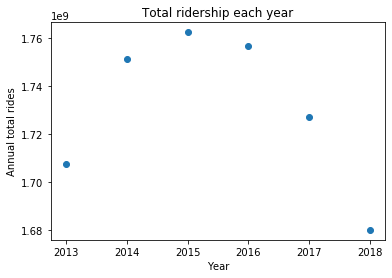

In [5]:
plt.plot(years,totals,"o")
plt.title("Total ridership each year")
plt.xlabel("Year")
plt.ylabel("Annual total rides")
plt.show()

Surprisingly this looks almost like a parabola! So, it seems reasonable to try to approximate the data by a degree two polynomial:
$$F(Y)=a + bY + cY^2.$$
Here $Y$ represents a year, and we are hoping that $F(Y)$ is very close to the ridership that year.
We are looking to find a "best" choice of $F$. We will use the *least squares* (or $L^2$ notion of best). We will look for the function $F$ which makes the quantity
$$\sum_{Y=2013}^{2018} \big(F(Y)-T_Y\big)^2$$
smallest, where $T_Y$ is the total riders in year $Y$. Expanding our definition of $F$, we can write the function we are hoping to minimize as
$$M(a,b,c) = \sum_{Y=2013}^{2018} \big(a + bY + cY^2-T_Y\big)^2$$
We know from Calculus, at the minimizer we would have 
$$\frac{\partial M}{\partial a} = \frac{\partial M}{\partial b} = \frac{\partial M}{\partial c} = 0.$$ 
We compute
$$
\begin{array}{rcl}
\frac{\partial M}{\partial a}(a,b,c) & = & 2 \sum_{Y=2013}^{2018} \big(a + bY + cY^2-T_Y\big),\\
\frac{\partial M}{\partial b}(a,b,c) & = &  2 \sum_{Y=2013}^{2018} \big(a + bY + cY^2-T_Y\big) Y, \quad \text{and}\\
\frac{\partial M}{\partial b}(a,b,c) & = & 2 \sum_{Y=2013}^{2018} \big(a + bY + cY^2-T_Y\big) Y^2.\end{array}$$
Setting each of these equations equal to zero, dividing by $2$, and moving the terms that do not depend on $a$, $b$
or $c$ to the other side yields three linear equations:
$$\begin{array}{rrrrrrr}
a \sum_{Y=2013}^{2018} 1 & + & b \sum_{Y=2013}^{2018} Y & + & c \sum_{Y=2013}^{2018} Y^2 & = & \sum_{Y=2013}^{2018} T_Y, \\
a \sum_{Y=2013}^{2018} Y & + & b \sum_{Y=2013}^{2018} Y^2 & + &  c \sum_{Y=2013}^{2018} Y^3 & = & \sum_{Y=2013}^{2018} Y T_Y, \\
a \sum_{Y=2013}^{2018} Y^2 & + & b \sum_{Y=2013}^{2018} Y^3 & + & c \sum_{Y=2013}^{2018} Y^4 & = & \sum_{Y=2013}^{2018} Y^2 T_Y.
\end{array}$$
We can write this as a matrix equation:
$$
\left(\begin{matrix}
\sum_{Y=2013}^{2018} 1 & \sum_{Y=2013}^{2018} Y & \sum_{Y=2013}^{2018} Y^2 \\
\sum_{Y=2013}^{2018} Y & \sum_{Y=2013}^{2018} Y^2 & \sum_{Y=2013}^{2018} Y^3 \\
\sum_{Y=2013}^{2018} Y^2 & \sum_{Y=2013}^{2018} Y^3 & \sum_{Y=2013}^{2018} Y^4 \\
\end{matrix}\right)
\left(\begin{matrix}
a \\ b \\ c
\end{matrix}\right)=
\left(\begin{matrix}
\sum_{Y=2013}^{2018} T_Y \\
\sum_{Y=2013}^{2018} Y T_Y \\
\sum_{Y=2013}^{2018} Y^2 T_Y
\end{matrix}\right).
$$


In [6]:
M = np.zeros((3,3), dtype=int)
M

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [7]:
for i in range(3):
    for j in range(3):
        for year in years:
            M[i,j] += year**(i+j)
M

array([[             6,          12093,       24373459],
       [         12093,       24373459,    49124777157],
       [      24373459,    49124777157, 99011201627635]])

In [8]:
r = np.zeros(3, dtype=int)
for i in range(3):
    r[i] = sum([year**i * total for year,total in ridership_data])
r

array([      10385650563,    20932171214616, 42188604306081128])

In [9]:
coefs = linalg.solve(M,r)
coefs

<ipython-input-9-7a8c8a00b9b9>:1: LinAlgWarning: Ill-conditioned matrix (rcond=2.28157e-26): result may not be accurate.
  coefs = linalg.solve(M,r)


array([-4.48226649e+13,  4.44858529e+10, -1.10374586e+07])

In [10]:
a,b,c = coefs
F = lambda Y: a + b*Y + c*Y**2

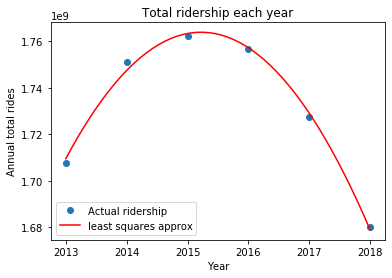

In [11]:
years = [year for year,total in ridership_data]
totals = [total for year,total in ridership_data]

actual, = plt.plot(years,totals,"o", label="Actual ridership")
x = np.linspace(years[0],years[-1])
y = F(x)
least_squares, = plt.plot(x, y, "r", label="least squares approx")
plt.title("Total ridership each year")
plt.xlabel("Year")
plt.ylabel("Annual total rides")
legend = plt.legend(handles=[actual,least_squares], loc='lower left')
plt.show()

The function looks like a good fit, so we might guess that the ridership in $2019$ will be approximatey:

In [12]:
F(2019)

1606426459.2578125

## Linear Algebraic Treatment

A *(real) vector space* is a set $V$ which is closed under operations of
* addition (i.e., for every $v,w \in V$, we have $v+w \in V$), and
* scalar multiplication (i.e., for every $s \in {\mathbb R}$ and $v \in V$, we have $sv \in V$).
In addition, these operations must satisfy the usual axioms.

An *inner product* on $V$ is an map $V \times V \to {\mathbb R}$ satisfying certain properties. The most familiar example is the dot product on ${\mathbb R}^n$. We'll denote a general inner product by $\langle v, w\rangle$. The properties are:
* *Symmetry:* for every $v, w \in V$, $\langle v,w\rangle = \langle w, v\rangle$.
* *Bi-linearity:* Given any $v$ the map $w \mapsto \langle v, w \rangle$ is linear, i.e., 
    * for every $s \in {\mathbb R}$ and every $w \in V$, we have $\langle v, sw \rangle = s \langle v, w \rangle$.
    * for every $w_1, w_2 \in V$, we have $\langle v, w_1 + w_2 \rangle = \langle v, w_1 \rangle + \langle v, w_2 \rangle.$
Then there is another property, which has two possible forms. The inner product is said to be 
* *positive-definite* if $\langle v, v \rangle > 0$ whenever $v \in V$ is non-zero.

(By bilinearity, it is true that $\langle 0, w \rangle = 0$ for every $w \in V$.) It is said to be 
* *positive semi-definite* if $\langle v, v \rangle \geq 0$ for every $v \in V$.

A positive-definite inner product naturally leads to a distance function, where the distance from $v$ to $w$ is 
$$d(v,w) = \sqrt{\langle v-w, v-w \rangle}.$$
The norm of a vector $v$ is its distance from $0$, which is usually denoted $\|v\|$. We have
$$\|v\|=\sqrt{\langle v,v\rangle}.$$
In the positive semi-definite case, you can still make this definition but the distance is *degenerate* in the sense that sometimes $d(v,w)=0$ even if $v \neq w$.

### Examples:

* The dot product on ${\mathbb R}^n$ induces the usual metric.
$$v \cdot w = \sum_{j=0}^{n-1} v_j w_j.$$
* More generally on ${\mathbb R}^n$, if we choose $n$ positive scalars $c_0, \ldots, c_{n-1} \in {\mathbb R}$ we can define an inner product by 
$$\langle v, w \rangle = \sum_{j=0}^{n-1} c_j v_j w_j.$$
We can use this for example to weight some components more than others.
* The space of continuous functions on the interval $[0,1]$ is a vector space. The $L^2$ inner product is defined
$$\langle f, g \rangle = \int_0^1 f(t) g(t)~dt.$$
This inner product is positive definite. You can replace $[0,1]$ by any closed and bounded subset of ${\mathbb R}$ or ${\mathbb R}^n$.
* Suppose we are working with the space of continuous functions ${\mathbb R} \to {\mathbb R}$ and we have data about some points $t_0, \ldots, t_{m-1}$. Choose positive scalars $c_0, \ldots, c_{m-1} \in {\mathbb R}$. Then we can define an inner product by 
$$\langle f, g \rangle = \sum_{j=0}^{m-1} c_j f(t_j) g(t_j).$$
This is the inner product that the ridership example is based on: the $t_0, \ldots, t_{m-1}$ are the available years of data, and we weighted all years equally, with each $c_j=1$. If we wanted to predict future ridership, it may have been better to weight more recent years more heavily (e.g., if $t_0=2013$ and $t_5=2018$, then we would want $c_5>c_0$).
This inner product is only positive semi-definite since for example if $f$ is the polynomial
$$f(x) = (x-t_0)(x-t_1)\ldots(x-t_{m-1})$$
then $\langle f, f\rangle =0$ even though $f \neq 0$.

### Orthogonal projection:

Two vectors $v$ and $w$ are *orthogonal* if $\langle v, w\rangle=0$.

Let $W$ be a subset of a vector space $V$. We say $W$ is a *subspace* if it is closed under addition and scalar multiplication. We say $\langle,\rangle$ is *positive-definite on $W$* if $\langle w, w \rangle>0$ for every non-zero $w \in W$. 

An example of a subspace of all continuous functions ${\mathbb R} \to {\mathbb R}$ is the polynomials of degree less than $d$.

**Theorem.** If $W$ is finite dimensional and the inner product $\langle,\rangle$ on $V$ is positive-definite on $W$, then for every $v_\ast \in V$ there is a unique $w_\ast \in W$ that minimizes the distance from $v_\ast$. The vector $v_\ast - w_\ast$ is uniquely determined by the condition that it is orthogonal to every vector in $W$. 

We call $w_\ast$ the *projection of $v_\ast$ onto $W$*, and write $w_\ast=proj_W(v_\ast)$. 

We will not formally prove this theorem, but it can be proven using the projection formulas described below.

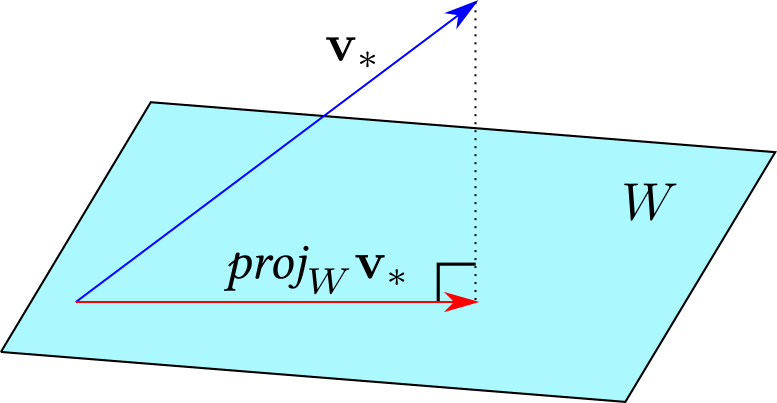

### Connection to Least Squares:

In least squares, we usually have a collection of inputs $t_0, \ldots, t_{m-1}$ and outputs measurements say $M(t_0), \ldots, M(t_{m-1})$. The possible outputs lie in ${\mathbb R}^{m}$ with our data representing the vector
$$v_\ast = \left(\begin{matrix} M(t_0)\\ \vdots \\ M(t_{m-1}) \end{matrix}\right) \in {\mathbb R}^m.$$

If we want to approximate by polynomials of degree less than or equal to $d$, then we consider the subspace
$$W = \textit{span} \left\{ 
\left(\begin{matrix} 1 \\ \vdots \\ 1 \end{matrix}\right),
\left(\begin{matrix} t_0 \\ \vdots \\ t_{m-1} \end{matrix}\right),
\left(\begin{matrix} t_0^2 \\ \vdots \\ t_{m-1}^2 \end{matrix}\right), \ldots
\left(\begin{matrix} t_0^d \\ \vdots \\ t_{m-1}^d \end{matrix}\right)\right\}.$$
Vectors in $W$ represent restrictions of polynomials of degree less than $d$ to the points $t_0, \ldots, t_{m-1}$.

The quantity we want to minimize is 
$$\sum_{j=0}^{m-1} \big(w_j - M(t_j)\big)^2=d(v_\ast, w)^2.$$
where $w$ is taken over all vectors in $W$. Thus we want the closest $w$ to $v_\ast$, $w_\ast=proj_W(v_\ast)$. 


<div style="background-color: #FFA">
    <h3>Projection formulas</h3>

If $W$ is one-dimensional, it has the form $W=\textit{span} \{w_0\}=\{s w_0:~s \in {\mathbb R}\}$. In this case, 
$$proj_W(v)=\frac{\langle v, w \rangle}{\langle w, w\rangle} w.$$
Note that if $\|w\|=1$, the denominator becomes one.

If $W$ has dimension $d>1$, it is useful to have an *orthogonal basis*. This is a basis $\{w_0, w_1, \ldots, w_{d-1}\}$ with the property that $w_i$ and $w_j$ are orthogonal ($\langle w_i, w_j\rangle=0$) whenever $i \neq j$. With an orthogonal basis, we can compute 
$$proj_W(v)=\sum_{j=0}^{d-1} \frac{\langle v, w_j \rangle}{\langle w_j, w_j\rangle} w_j.$$
</div>

<div style="background-color: #FFA">
    <h3>The Gram-Schmidt Othogonalization Process</h3>

Suppose we have a vector space (or subspace) $W$ with an positive-definite inner product and $W$ has a basis $\{w_0, \ldots, w_{d-1}\}$. We can use repeated projections to produce an orthogonal basis $\{y_0, \ldots, y_{d-1}\}$. We define:
* $y_0 = w_0$.
* $y_1 = w_1 - proj_{\textit{span}\{y_0\}}(w_1)=w_1 - \frac{\langle w_1, y_0 \rangle}{\langle y_0, y_0\rangle} y_0$.
* $y_2 = w_2 - proj_{\textit{span}\{y_0,y_1\}}(w_2)=w_2 - \frac{\langle w_2, y_0 \rangle}{\langle y_0, y_0\rangle} y_0 - \frac{\langle w_2, y_1 \rangle}{\langle y_1, y_1\rangle} y_1$.
* $\vdots$
* $y_{d-1} = w_{d-1} - proj_{\textit{span}\{y_0,\ldots, y_{d-2}\}}(w_{d-1})=w_{d-1} - \sum_{j=1}^{d-2} \frac{\langle w_{d-1}, y_j \rangle}{\langle y_j, y_j\rangle} y_j$.

After this process is done, we have the projection formula:
$$proj_W(v)=\sum_{j=0}^{d-1} \frac{\langle v, y_j \rangle}{\langle y_j, y_j\rangle} y_j.$$
</div>

## Revisiting ridership

I want to repeat our study of the example of ridership on the subway from this higher level viewpoint. The vector we are trying to approximate with a quadratic polynomial is `totals`:

In [13]:
totals

[1707555714, 1751287621, 1762565419, 1756814800, 1727366607, 1680060402]

The entries represent values each year, as given in the `years` vector:

In [14]:
years

[2013, 2014, 2015, 2016, 2017, 2018]

We want to find an approximation by a quadratic polynomial of the form
$$a + bx + cx^2.$$
But, we only want to compare years where we have data. The following converts a triple of coefficients to the vector of values taken at each year.

In [15]:
def coefficients_to_vector(triple):
    a,b,c = triple
    return_list = []
    for year in years:
        return_list.append(a + b*year + c*year**2)
    return np.array(return_list)

It is important to realize that are working with two coordinate systems. 

The first coordinate system is for working with functions from years to the real numbers. Our original data is presented in this coordinate system. Since there are six years in our data, we think of our original data as giving an element of ${\mathbb R}^6$ with each coordinate representing the number of riders in the corresponding year.

The second coordinate system is given by coefficients of quadratic polynomials. The polynomial $a + bx+c x^2$ will be represented by the triple of coordinates $(a,b,c) \in {\mathbb R}^3$.

We can evaluate a polynomial on a year in our data set. Thus quadratic polynomials have a second coordinate representation in ${\mathbb R}^6$ given by evaluating the polynomial on the years we have data for. The `coefficient_to_vector` function above converts from coefficients to this vector in ${\mathbb R}^6$. The quadratic polynomials thus give a three dimensional subspace $W \subset {\mathbb R}^6$.

The least squares approximation for our data is obtained by orthogonally projecting our data point to $W$. That projection lies in $W$, and to think of it as a quadratic polynomial we want its representation as a triple of coefficients.

The natural basis for the space $W$ of quadratic polynomials is $t \mapsto 1$, $t \mapsto t$, and $t \mapsto t^2$. As coefficient vectors these are given by the following:

In [16]:
w0_coef = np.array([1,0,0])
w1_coef = np.array([0,1,0])
w2_coef = np.array([0,0,1])

Below we convert these to vectors of values in ${\mathbb R}^6$. So `w2_coef` is a polynomial given as coefficients and `w2_vector` will be the same polynomial viewed as a vector of values in ${\mathbb R}^6$.

In [17]:
w0_vector = coefficients_to_vector(w0_coef)
w1_vector = coefficients_to_vector(w1_coef)
w2_vector = coefficients_to_vector(w2_coef)
print(w0_vector, w1_vector, w2_vector)

[1 1 1 1 1 1] [2013 2014 2015 2016 2017 2018] [4052169 4056196 4060225 4064256 4068289 4072324]


Now we use Gram-Schmidt orthogonalization to convert our basis for $W$ into an orthogonal basis. We want to be able to access these basis elements in both coordinate systems. Note that we will only be using the dot product for comparing vectors (not coefficients). This is because we are interested in finding an orthogonal basis in ${\mathbb R}^6$, where we will be doing the projection.

In [18]:
y0_vector = w0_vector
y0_coef = w0_coef

In [19]:
y1_vector = w1_vector - ((w1_vector @ y0_vector)/(y0_vector @ y0_vector)) * y0_vector
y1_coef = w1_coef - ((w1_vector @ y0_vector)/(y0_vector @ y0_vector)) * y0_coef

In [20]:
# Sanity check that y1_vector is orthogonal to y0_vector
y0_vector @ y1_vector

0.0

In [21]:
y2_vector = w2_vector - ((w2_vector @ y0_vector)/(y0_vector @ y0_vector)) * y0_vector \
                      - ((w2_vector @ y1_vector)/(y1_vector @ y1_vector)) * y1_vector
y2_coef = w2_coef - ((w2_vector @ y0_vector)/(y0_vector @ y0_vector)) * y0_coef \
                  - ((w2_vector @ y1_vector)/(y1_vector @ y1_vector)) * y1_coef

In [22]:
# Sanity check that y2_vector is orthogonal to y0_vector and y1_vector:
print(y0_vector @ y2_vector)
print(y1_vector @ y2_vector)

9.313225746154785e-10
0.0


Now we have an orthogonal basis of quadratic polynomials. We can compute the projection of `totals` onto this space:

In [23]:
proj_vector =   ((totals @ y0_vector)/(y0_vector @ y0_vector)) * y0_vector \
              + ((totals @ y1_vector)/(y1_vector @ y1_vector)) * y1_vector \
              + ((totals @ y2_vector)/(y2_vector @ y2_vector)) * y2_vector

It should be true that the original minus the projection should be orthogonal to the subspace. To check the angle made between `totals-proj_vector` and `y0_vector`, we can use the dot product. Recall that for two vectors $v$ and $w$.
$$v \cdot w = \|v\| \|w\| \cos \theta$$ where
$\theta$ is the angle between them. Thus, we have 
$$\cos \theta = \frac{v \cdot w}{\|v\| \|w\|}.$$
We can get the length of a vector $v$ using `np.linalg.norm(v)`.

In [24]:
print(((totals-proj_vector) @ y0_vector) / (np.linalg.norm(totals-proj_vector)*np.linalg.norm(y0_vector)))
print(((totals-proj_vector) @ y1_vector) / (np.linalg.norm(totals-proj_vector)*np.linalg.norm(y1_vector)))
print(((totals-proj_vector) @ y2_vector) / (np.linalg.norm(totals-proj_vector)*np.linalg.norm(y2_vector)))

8.634026119161823e-10
1.1726047297206794e-14
-5.4283079546264206e-08


Note that there are some numerical issues: we are not getting exactly zero.

We really want to get the coefficients. We use the same weights on coefficients for the projection.

In [25]:
proj_coef =   ((totals @ y0_vector)/(y0_vector @ y0_vector)) * y0_coef \
            + ((totals @ y1_vector)/(y1_vector @ y1_vector)) * y1_coef \
            + ((totals @ y2_vector)/(y2_vector @ y2_vector)) * y2_coef
proj_coef

array([-4.48224359e+13,  4.44856256e+10, -1.10374022e+07])

Note that this recovers essentially the same coefficients as our elementary approach resulted with before:

In [26]:
coefs

array([-4.48226649e+13,  4.44858529e+10, -1.10374586e+07])

Since they are slightly different, lets plot it again with the new coefficients.

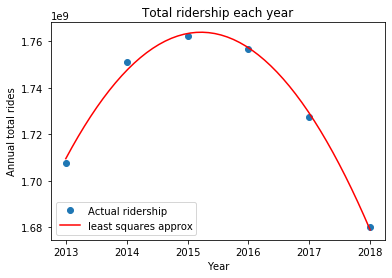

In [27]:
a,b,c = proj_coef
F = lambda x: a + b*x + c*x**2

years = [year for year,total in ridership_data]
totals = [total for year,total in ridership_data]

actual, = plt.plot(years,totals,"o", label="Actual ridership")
x = np.linspace(years[0],years[-1])
y = F(x)
least_squares, = plt.plot(x, y, "r", label="least squares approx")
plt.title("Total ridership each year")
plt.xlabel("Year")
plt.ylabel("Annual total rides")
legend = plt.legend(handles=[actual,least_squares], loc='lower left')
plt.show()

We can actually compare our two solutions and see which is better. We'll compute the norm of the difference between totals and the vector arising from our coefficients using our first computation:

In [28]:
np.linalg.norm(coefficients_to_vector(coefs)-totals)

4860371.107172297

Here is the same computation for the second way of computing things using the projection.

In [29]:
np.linalg.norm(coefficients_to_vector(proj_coef)-totals)

4860371.097369923

The second number is a bit smaller, so our second approach is slightly better.

## Legendre polynomials

The Legendre polynomials give a basis for polynomials on $[-1,1]$ of degree $\leq d$ where the inner product is 
$$\langle f, g\rangle = \int_{-1}^1 f(x)g(x)~dx.$$
The first few are in TAK in equation (4.36) on page 123. They normalize the polynomials so that $p(1)=1$. 

We will use a vector $[a_0, a_1, \ldots, a_d]$ to represent the polynomial
$$t \mapsto a_0 + a_1 t + a_2 t^2 + \ldots + a_d t^d.$$

In [30]:
def coef_to_polynomial(coefs):
    def f(t):
        total = 0.0
        for j in range(len(coefs)):
            total += coefs[j] * t**j
        return total
    return f

The product of a polynomial of degree $d_1$ and a polynomial of degree $d_2$ is a polynomial of degree $d_1+d_2$. The following computes the coefficients of products.

In [31]:
def coef_product(coefs1, coefs2):
    return_coefs = np.zeros(len(coefs1)+len(coefs2)-1)
    for i in range(len(coefs1)):
        for j in range(len(coefs2)):
            return_coefs[i+j] += coefs1[i]*coefs2[j]
    return return_coefs

Unfortuately, we also can't just add polynomials because you can only add vectors with the same number of coefficients.

In [32]:
def coef_add(coefs1, coefs2):
    N = max(len(coefs1), len(coefs2))
    return_coefs = np.zeros(N)
    for j in range(len(coefs1)):
        return_coefs[j] += coefs1[j]
    for j in range(len(coefs2)):
        return_coefs[j] += coefs2[j]
    return return_coefs

To test our function observe that $(1+2x)(3+4x)=3+10x+8x^2$. We can compute this:

In [33]:
coef_product([1,2],[3,4])

array([ 3., 10.,  8.])

The following takes coefficients for a polynomial $p$ and returns $\int_{-1}^1 p(t)~dt$. Note that 
$$\int_{-1}^1 t^j~dt = \begin{cases}
0 & \text{if $j$ is odd,} \\
\frac{2}{j+1} & \text{if $j$ is even.}
\end{cases}$$

In [34]:
def coef_integral(coefs):
    total = 0.0
    for j in range(0, len(coefs), 2):
        total += 2 * coefs[j] / (j+1)
    return total

Here we check our work:

In [35]:
coef_integral([1,1,1])

2.6666666666666665

With the functions above we can define the inner product:

In [36]:
def ip(coefs1, coefs2):
    return coef_integral(coef_product(coefs1, coefs2))

Suppose we want the first $D$ Legendre Polynomials. Following the book we'll use

In [37]:
D = 4

The usual basis for the polynomials of degree $D$ is given by below:

In [38]:
W = []
for j in range(D+1):
    W.append(np.array(j*[0] + [1]))
W

[array([1]),
 array([0, 1]),
 array([0, 0, 1]),
 array([0, 0, 0, 1]),
 array([0, 0, 0, 0, 1])]

Now we use Gram-Schmidt to produce an orthogonal basis.

In [39]:
Y = [W[0]]
for j in range(1, D+1):
    w = W[j]
    y = w.copy()
    for k in range(j):
        y = coef_add(y, - (ip(w,Y[k])/ip(Y[k],Y[k])) * Y[k])
    Y.append(y)
Y

[array([1]),
 array([0., 1.]),
 array([-0.33333333,  0.        ,  1.        ]),
 array([ 0. , -0.6,  0. ,  1. ]),
 array([ 0.08571429,  0.        , -0.85714286,  0.        ,  1.        ])]

These functions are not normalized in the sense that $p(1)=1$. Here we produce a normalized list:

In [40]:
YN = []
for y in Y:
    f = coef_to_polynomial(y)
    YN.append(y / f(1))
YN

[array([1.]),
 array([0., 1.]),
 array([-0.5,  0. ,  1.5]),
 array([ 0. , -1.5,  0. ,  2.5]),
 array([ 0.375,  0.   , -3.75 ,  0.   ,  4.375])]

We can see that the polynomials whose coefficients are given as above are the same as the Legendre Polynomials listed in (4.36).

## Using the Legendre Polynomials

The book has several problems and examples using continuous least squares approximation over intervals. Here you want to find a projection to a space of polynomials using an inner product coming from an integral. Once you have an orthogonal basis, you can use the usual projection formula to compute the least squares approximation.

Let's try to find the best approximation to $\cos(x)$ on the interal $[-1,1]$ by a polynomial of degree less than four. This will be given by 
$$\sum_{j=0}^4 \frac{\langle y_j, \cos \rangle}{\langle y_j, y_j \rangle} y_j$$
where $y_0, \ldots, y_4$ represents the Legendre polynomials of degree up to $4$.

We don't currently have the ability to evaluate 
$$\langle y_j, \cos \rangle= \int_{-1}^1 y_j(t) \cos(t)~dt.$$
Since $y_j$ is a polynomial of degree less than $4$, to figure this out from the coefficients we need to know 
$$\int_{-1}^1 t^d \cos(t)~dt.$$
for $k \in \{0,1,2,3,4\}$. Observe that if $k$ is odd, we are integrating an odd function over the symmetric integral $[-1,1]$ so this evaluates to zero. Now consider the even case. When $k=0$, we have 
$$\int_{-1}^1 t^0 \cos(t)~dt=\int_{-1}^1 \cos(t)~dt=[\sin t]_{-1}^1 = 2 \sin(1). \tag{1}$$
We can get an inductive formula for the other integrals using integration by parts. If $k \geq 2$ is even, we have
$$\int_{-1}^1 t^k \cos(t)~dt=[t^k \sin(t)]_{-1}^1 - \int_{-1}^1 k t^{k-1} \sin(t) ~dt.$$
Applying integration by parts again yields
$$\int_{-1}^1 t^k \cos(t)~dt=2 \sin(1) - [-k t^{k-1} \cos(t)]_{-1}^1 + \int_{-1}^1 -k (k-1) t^{k-2} \cos(t)~dt.$$
Simplifying, we see 
$$\int_{-1}^1 t^k \cos(t)~dt=2 \sin(1) + 2 k \cos(1) - k (k-1) \int_{-1}^1 t^{k-2} \cos(t)~dt. \tag{2}$$
Using (1) and (2) we get an inductive formula for 
$$z_k = \int_{-1}^1 t^k \cos(t)~dt.$$
We update the value of $z$ as we move through the even entries of the polynomial in the function below.

In [41]:
def integrate_poly_times_cos(coefs):
    # Return the integral from -1 to 1 of the function
    # p(t) * cos(t), where p(t) is the polynomial with
    # the provided coefficients.
    z = 2*m.sin(1)
    total = coefs[0] * z
    for k in range(2, len(coefs), 2):
        # Update the value of z:
        z = 2*m.sin(1) + 2*k*m.cos(1) - k*(k-1)*z
        # Update the total integral
        total += coefs[k] * z
    return total

Here we compute the degree $0$ best approximate, using the list `YN[:1]` of Legendre Polynomials up to degree 0:

In [42]:
proj_coefs = np.array([0])
for y in YN[:1]:
    proj_coefs = coef_add( proj_coefs, \
                           (integrate_poly_times_cos(y)/ip(y,y)) * y)
proj_coefs

array([0.84147098])

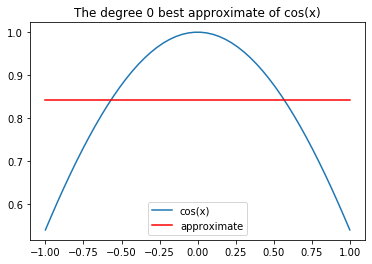

In [43]:
f = coef_to_polynomial(proj_coefs)
x = np.linspace(-1,1)
cos, = plt.plot(x, np.cos(x), label="cos(x)")
approx, = plt.plot(x, f(x), "r", label="approximate")
plt.title("The degree 0 best approximate of cos(x)")
legend = plt.legend(handles=[cos, approx], loc='lower center')
plt.show()

Since a degree zero polynomial is a constant function, we can't expect to get that close. But, $\cos(x)$ looks like a parabola, so degree $2$ should work better.

In [44]:
proj_coefs = np.array([0])
for y in YN[:3]:
    proj_coefs = coef_add( proj_coefs, \
                           (integrate_poly_times_cos(y)/ip(y,y)) * y)
proj_coefs

array([ 0.99655861,  0.        , -0.46526289])

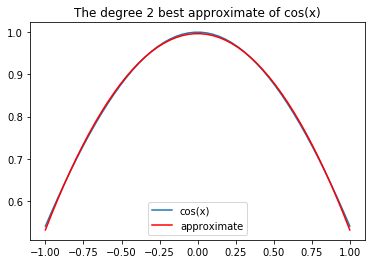

In [45]:
f = coef_to_polynomial(proj_coefs)
x = np.linspace(-1,1)
cos, = plt.plot(x, np.cos(x), label="cos(x)")
approx, = plt.plot(x, f(x), "r", label="approximate")
plt.title("The degree 2 best approximate of cos(x)")
legend = plt.legend(handles=[cos, approx], loc='lower center')
plt.show()

Here we plot the error $cos(x)-f(x)$. 

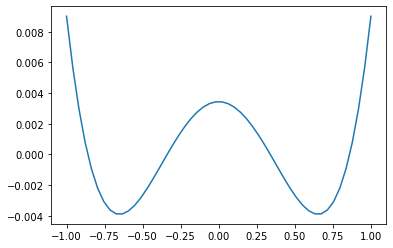

In [46]:
x = np.linspace(-1,1)
plt.plot(x, np.cos(x) - f(x))
plt.show()

Now we compute the degree four best approximate.

In [47]:
proj_coefs = np.array([0])
for y in YN:
    proj_coefs = coef_add( proj_coefs, \
                           (integrate_poly_times_cos(y)/ip(y,y)) * y)
proj_coefs

array([ 0.99997079,  0.        , -0.49938467,  0.        ,  0.03980875])

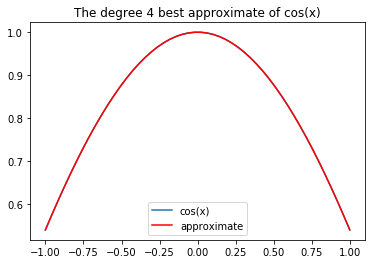

In [48]:
f = coef_to_polynomial(proj_coefs)
x = np.linspace(-1,1)
cos, = plt.plot(x, np.cos(x), label="cos(x)")
approx, = plt.plot(x, f(x), "r", label="approximate")
plt.title("The degree 4 best approximate of cos(x)")
legend = plt.legend(handles=[cos, approx], loc='lower center')
plt.show()

Now the approximate is completely on top of the graph of $\cos(x)$. We plot the error below.

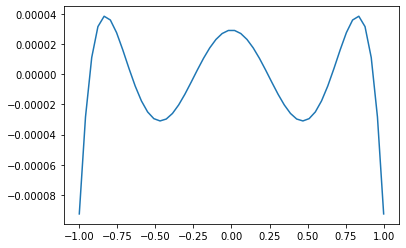

In [49]:
x = np.linspace(-1,1)
plt.plot(x, np.cos(x) - f(x))
plt.show()

Note that the order of the difference is much smaller.